In [2]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pylab as plt  # Importing Matplotlib for plotting and visualization
from matplotlib import pyplot  # Importing pyplot for simplified plotting functions
from sklearn import preprocessing  # Importing preprocessing module for data scaling and normalization
import statsmodels.api as sm  # Importing statsmodels for statistical models like OLS regression
from statsmodels.graphics.gofplots import qqplot  # Importing qqplot for Q-Q plots for normality checking
import missingno as msno  # Importing missingno for visualizing missing data patterns

from sklearn import model_selection  # Importing model selection utilities for cross-validation
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and test sets
from sklearn.linear_model import LinearRegression  # Importing Linear and Logistic Regression models
from sklearn.model_selection import train_test_split  # Importing train_test_split again (redundant, already imported earlier)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Importing various metrics for model evaluation
from tabulate import tabulate  # Importing tabulate for pretty-printing tables in the output
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error for evaluating regression model performance

In [3]:
pitchers = pd.read_csv("datasets/pitcher.csv")
teams = pd.read_csv("datasets/teams.csv")

pitchers.isnull().sum()

PitcherName                    0
TeamEnd1986                    0
LeagueEnd1986                  0
NumberWins1986                 0
NumberLoss1986                 0
EarnedRunAvg1986               0
NumberGames1986                0
NumberInningsPitched1986       0
NumberSaves1986                0
NumberYearsMajorLeague         0
NumberWinsCareer               0
NumberLossCareer               0
EarnedRunAvgCareer             0
NumberGamesCareer              0
NumberInningsPitchedCareer     0
NumberSavesCareer              0
AnnualSalaryOpenDay1987       30
League1987                     0
Team1987                       0
dtype: int64

<Axes: >

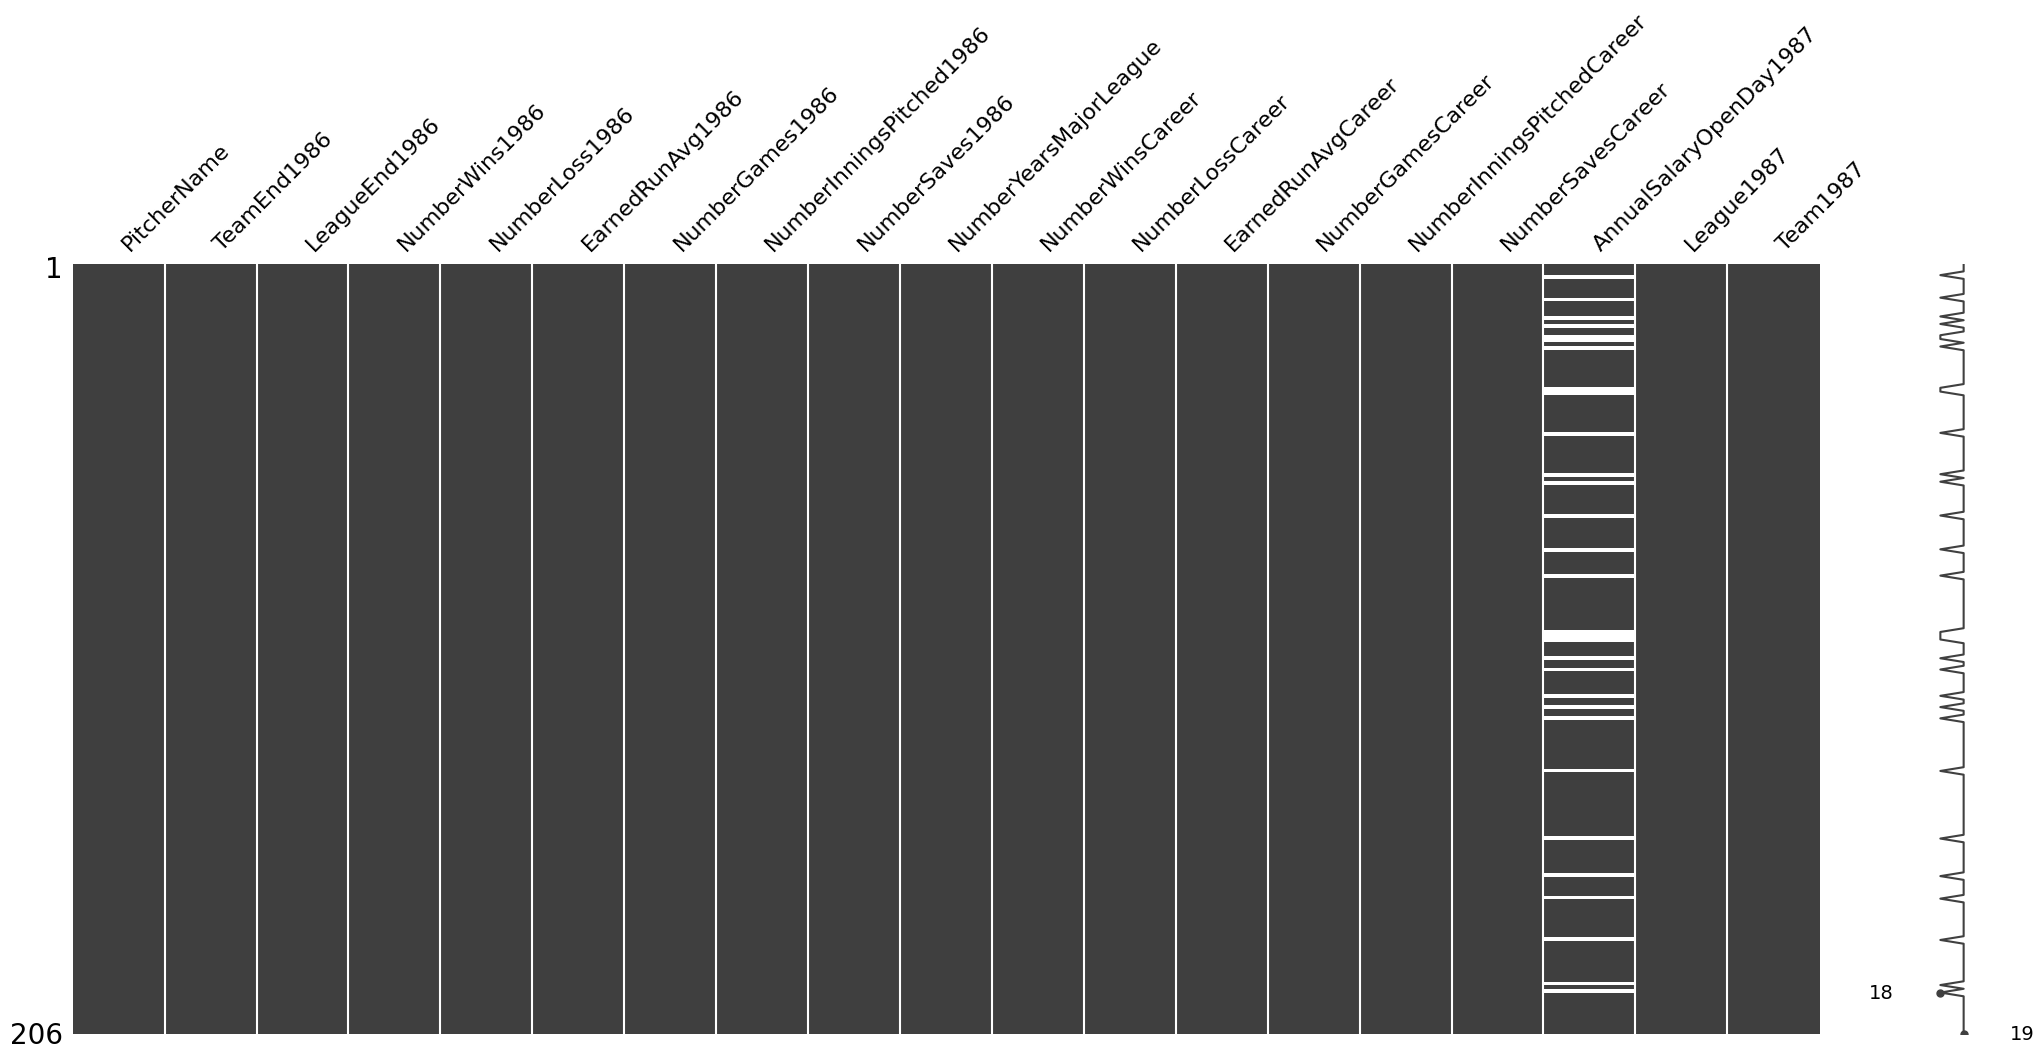

In [5]:
msno.matrix(pitchers)

In [7]:
pitchers.describe()

,NumberWins1986,NumberLoss1986,EarnedRunAvg1986,NumberGames1986,NumberInningsPitched1986,NumberSaves1986,NumberYearsMajorLeague,NumberWinsCareer,NumberLossCareer,EarnedRunAvgCareer,NumberGamesCareer,NumberInningsPitchedCareer,NumberSavesCareer,AnnualSalaryOpenDay1987
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,176.000000
mean,8.781553,8.233010,3.875922,39.660194,145.184466,4.378641,6.412621,53.606796,47.621359,3.700291,213.150485,887.236893,20.830097,497.535250
std,4.557048,3.688357,0.940507,15.527193,62.469395,8.261715,4.668487,58.850996,47.773779,0.637874,181.208280,951.922261,42.461061,371.974464
min,0.000000,0.000000,1.410000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,2.230000,4.000000,19.000000,0.000000,62.500000
25%,5.000000,5.000000,3.225000,30.000000,92.375000,0.000000,3.000000,16.000000,14.000000,3.275000,80.250000,263.250000,0.000000,158.750000
50%,9.000000,8.000000,3.835000,35.000000,138.600000,0.000000,5.000000,35.500000,31.500000,3.675000,154.500000,548.000000,3.000000,417.500000
75%,11.000000,11.000000,4.537500,50.000000,198.175000,5.000000,9.000000,64.500000,64.750000,4.082500,298.750000,1174.250000,15.750000,756.250000
max,24.000000,18.000000,8.590000,83.000000,275.100000,46.000000,23.000000,323.000000,261.000000,5.480000,853.000000,5264.200000,278.000000,1850.000000


In [11]:
# Transform the columns with categroical data like teamnames, leaugues and division indexes we know
TEAM_NAME_MAPPINGS = {
  "N.Y.":"New York",
"Phi.":"Philadelphia",
"St.L.":"St. Louis",
"Mon.":"Montreal",
"Chi.":"Chicago",
"Pit.":"Pittsburgh",
"Hou.":"Houston",
"Cin.":"Cincinnati",
"S.F.":"San Francisco",
"S.D.":"San Diego",
"L.A.":"Los Angeles",
"Atl.":"Atlanta",
"Bos.":"Boston",
"Det.":"Detroit",
"Tor.":"Toronto",
"Cle.":"Cleveland",
"Mil.":"Milwaukee",
"Bal.":"Baltimore",
"Cal.":"California",
"Tex.":"Texas",
"K.C.":"Kansas City",
"Oak.":"Oakland",
"Min.":"Minnesota",
"Sea.":"Seattle",
}
TEAM_NAME_INDEXES = (
  "N.Y.",
"Phi.",
"St.L.",
"Mon.",
"Chi.",
"Pit.",
"Hou.",
"Cin.",
"S.F.",
"S.D.",
"L.A.",
"Atl.",
"Bos.",
"Det.",
"Tor.",
"Cle.",
"Mil.",
"Bal.",
"Cal.",
"Tex.",
"K.C.",
"Oak.",
"Min.",
"Sea.",
)
LEAGUE_MAPPINGS = {"N":"National","A":"American"}
LEAGUE_INDEXES = ("N", "A")
DIVISION_MAPPINGS = {"W":"WEST","E":"EAST"}
DIVISION_INDEXES = ("W", "E")
PLAYER_POSITION_MAPPINGS = {
  "1B":   "First Base",
     "2B":   "Second Base",
     "SS":   "Short Stop",
     "3B":   "Third Base",
     "RF":  "Right Field",
     "CF":   "Center Field",
     "LF":   "Left Field",
     "C":    "Catcher",
     "DH":   "Designated Hitter",
     "OF":   "Outfield",
     "UT":   "Utility",
     "OS":   "Outfield and Short Stop",
     "3S":   "Third Base and Short Stop",
     "13":   "First and Third Base",
     "3O":   "Third Base and Outfield",
     "O1":   "Outfield and First Base",
     "S3":   "Short Stop and Third Base",
     "32":   "Third and Second Base",
     "DO":   "Designated Hitter and Outfield",
     "OD":   "Outfield and Designated Hitter",
     "CD":   "Catcher and Designated Hitter",
     "CS":   "Catcher and Short Stop",
     "23":   "Second and Third Base",
     "1O":   "First Base and Outfield",
     "2S":  "Second Base and Short Stop",
}
PLAYER_POSITION_INDEXES = tuple(PLAYER_POSITION_MAPPINGS.keys())



In [12]:
def transform_labels(map):
  def mapper(val):
    return map.index(val)+1
  return mapper
pitchers["LeagueEnd1986Labels"] = pitchers["LeagueEnd1986"].transform(transform_labels(LEAGUE_INDEXES))

pitchers["TeamEnd1986Labels"] = pitchers["TeamEnd1986"].transform(transform_labels(TEAM_NAME_INDEXES))

pitchers["League1987Labels"] = pitchers["League1987"].transform(transform_labels(LEAGUE_INDEXES))
pitchers["Team1987Labels"] = pitchers["Team1987"].transform(transform_labels(TEAM_NAME_INDEXES))
pitchers.head()

,PitcherName,TeamEnd1986,LeagueEnd1986,NumberWins1986,NumberLoss1986,EarnedRunAvg1986,NumberGames1986,NumberInningsPitched1986,NumberSaves1986,NumberYearsMajorLeague,...,NumberGamesCareer,NumberInningsPitchedCareer,NumberSavesCareer,AnnualSalaryOpenDay1987,League1987,Team1987,LeagueEnd1986Labels,TeamEnd1986Labels,League1987Labels,Team1987Labels
0,Don Aase,Bal.,A,6,7,2.98,66,81.2,34,9,...,325,956.2,75,625.0,A,Bal.,2,18,2,18
1,Jim Acker,Atl.,N,5,12,4.01,44,155.0,0,4,...,175,411.0,12,350.0,N,Atl.,1,12,1,12
2,Rick Aguilera,N.Y.,N,10,7,3.88,28,141.2,0,2,...,49,264.0,0,195.0,N,N.Y.,1,1,1,1
3,Doyle Alexander,Atl.,N,11,10,4.14,34,228.1,0,16,...,467,2709.0,3,NaN,N,Atl.,1,12,1,12
4,Neil Allen,Chi.,A,7,2,3.82,22,113.0,0,8,...,367,793.2,75,1200.0,A,Chi.,2,5,2,5


In [13]:
pitchers.isnull().sum()

PitcherName                    0
TeamEnd1986                    0
LeagueEnd1986                  0
NumberWins1986                 0
NumberLoss1986                 0
EarnedRunAvg1986               0
NumberGames1986                0
NumberInningsPitched1986       0
NumberSaves1986                0
NumberYearsMajorLeague         0
NumberWinsCareer               0
NumberLossCareer               0
EarnedRunAvgCareer             0
NumberGamesCareer              0
NumberInningsPitchedCareer     0
NumberSavesCareer              0
AnnualSalaryOpenDay1987       30
League1987                     0
Team1987                       0
LeagueEnd1986Labels            0
TeamEnd1986Labels              0
League1987Labels               0
Team1987Labels                 0
dtype: int64

In [14]:
pitchers_copy = pitchers.dropna()
pitchers_copy.isnull().sum()
pitchers_copy.shape

(176, 23)

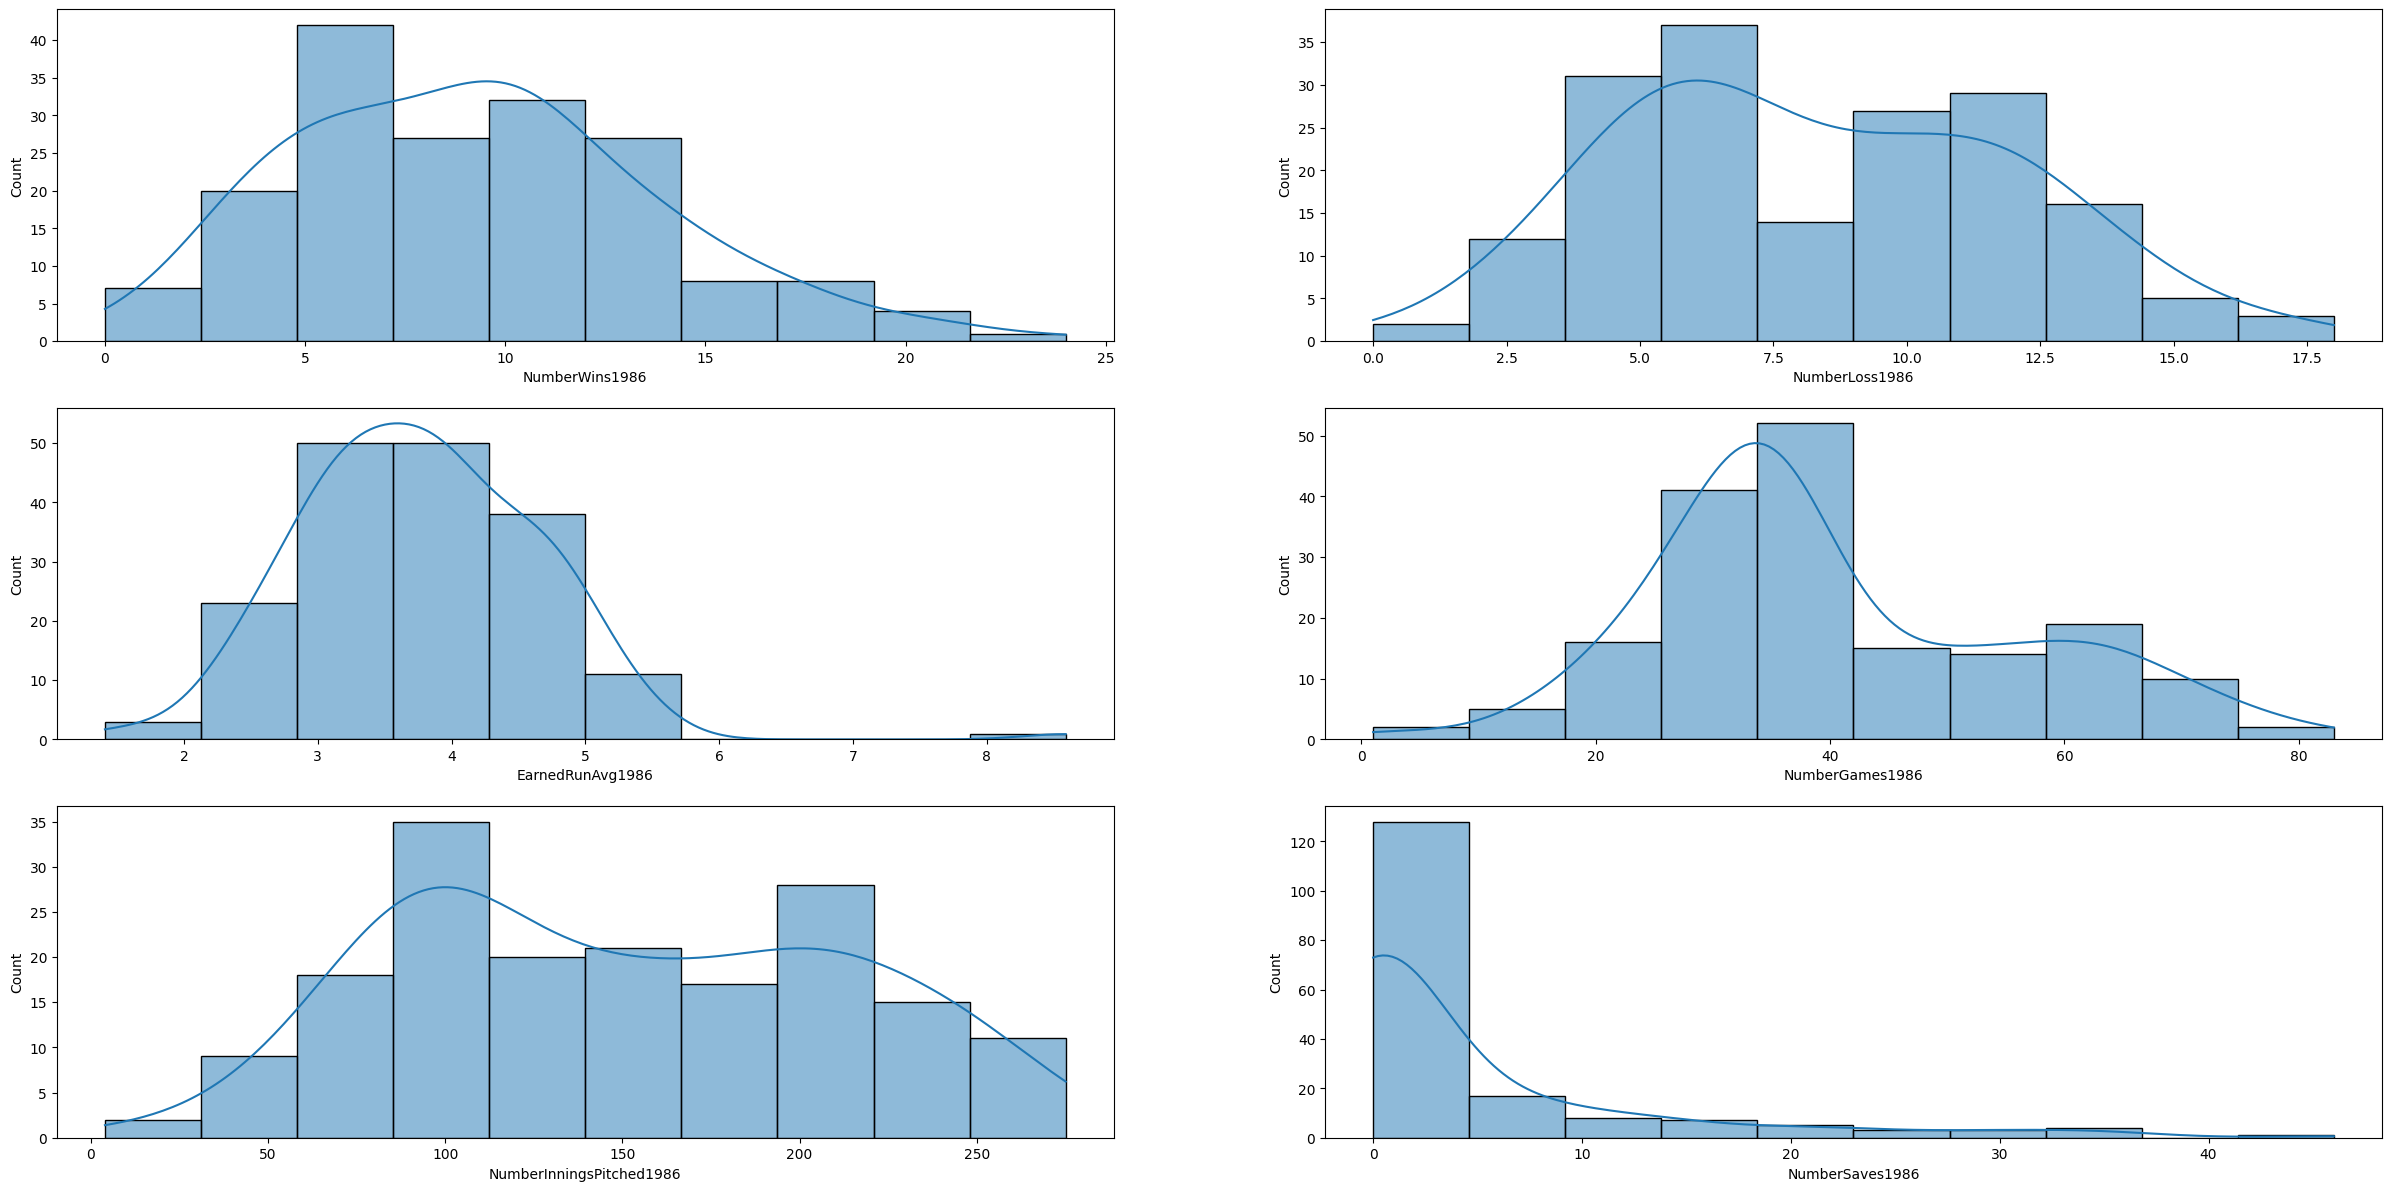

In [ ]:
performance_metrics = []
performance_1986 = ["NumberWins1986","NumberLoss1986","EarnedRunAvg1986","NumberGames1986","NumberInningsPitched1986","NumberSaves1986"]
performance_career = ["NumberWinsCareer","NumberLossCareer","EarnedRunAvgCareer","NumberGamesCareer","NumberInningsPitchedCareer","NumberSavesCareer"]
non_performance_metrics = ["TeamEnd1986","LeagueEnd1986","NumberYearsMajorLeague","League1987","Team1987"]
target = ["AnnualSalaryOpenDay1987"]



plt.figure(figsize=(30,25))
for i,col in enumerate(performance_1986,1):
    plt.subplot(5,2,i)
    sns.histplot(pitchers_copy[col],kde=True,bins = 10)

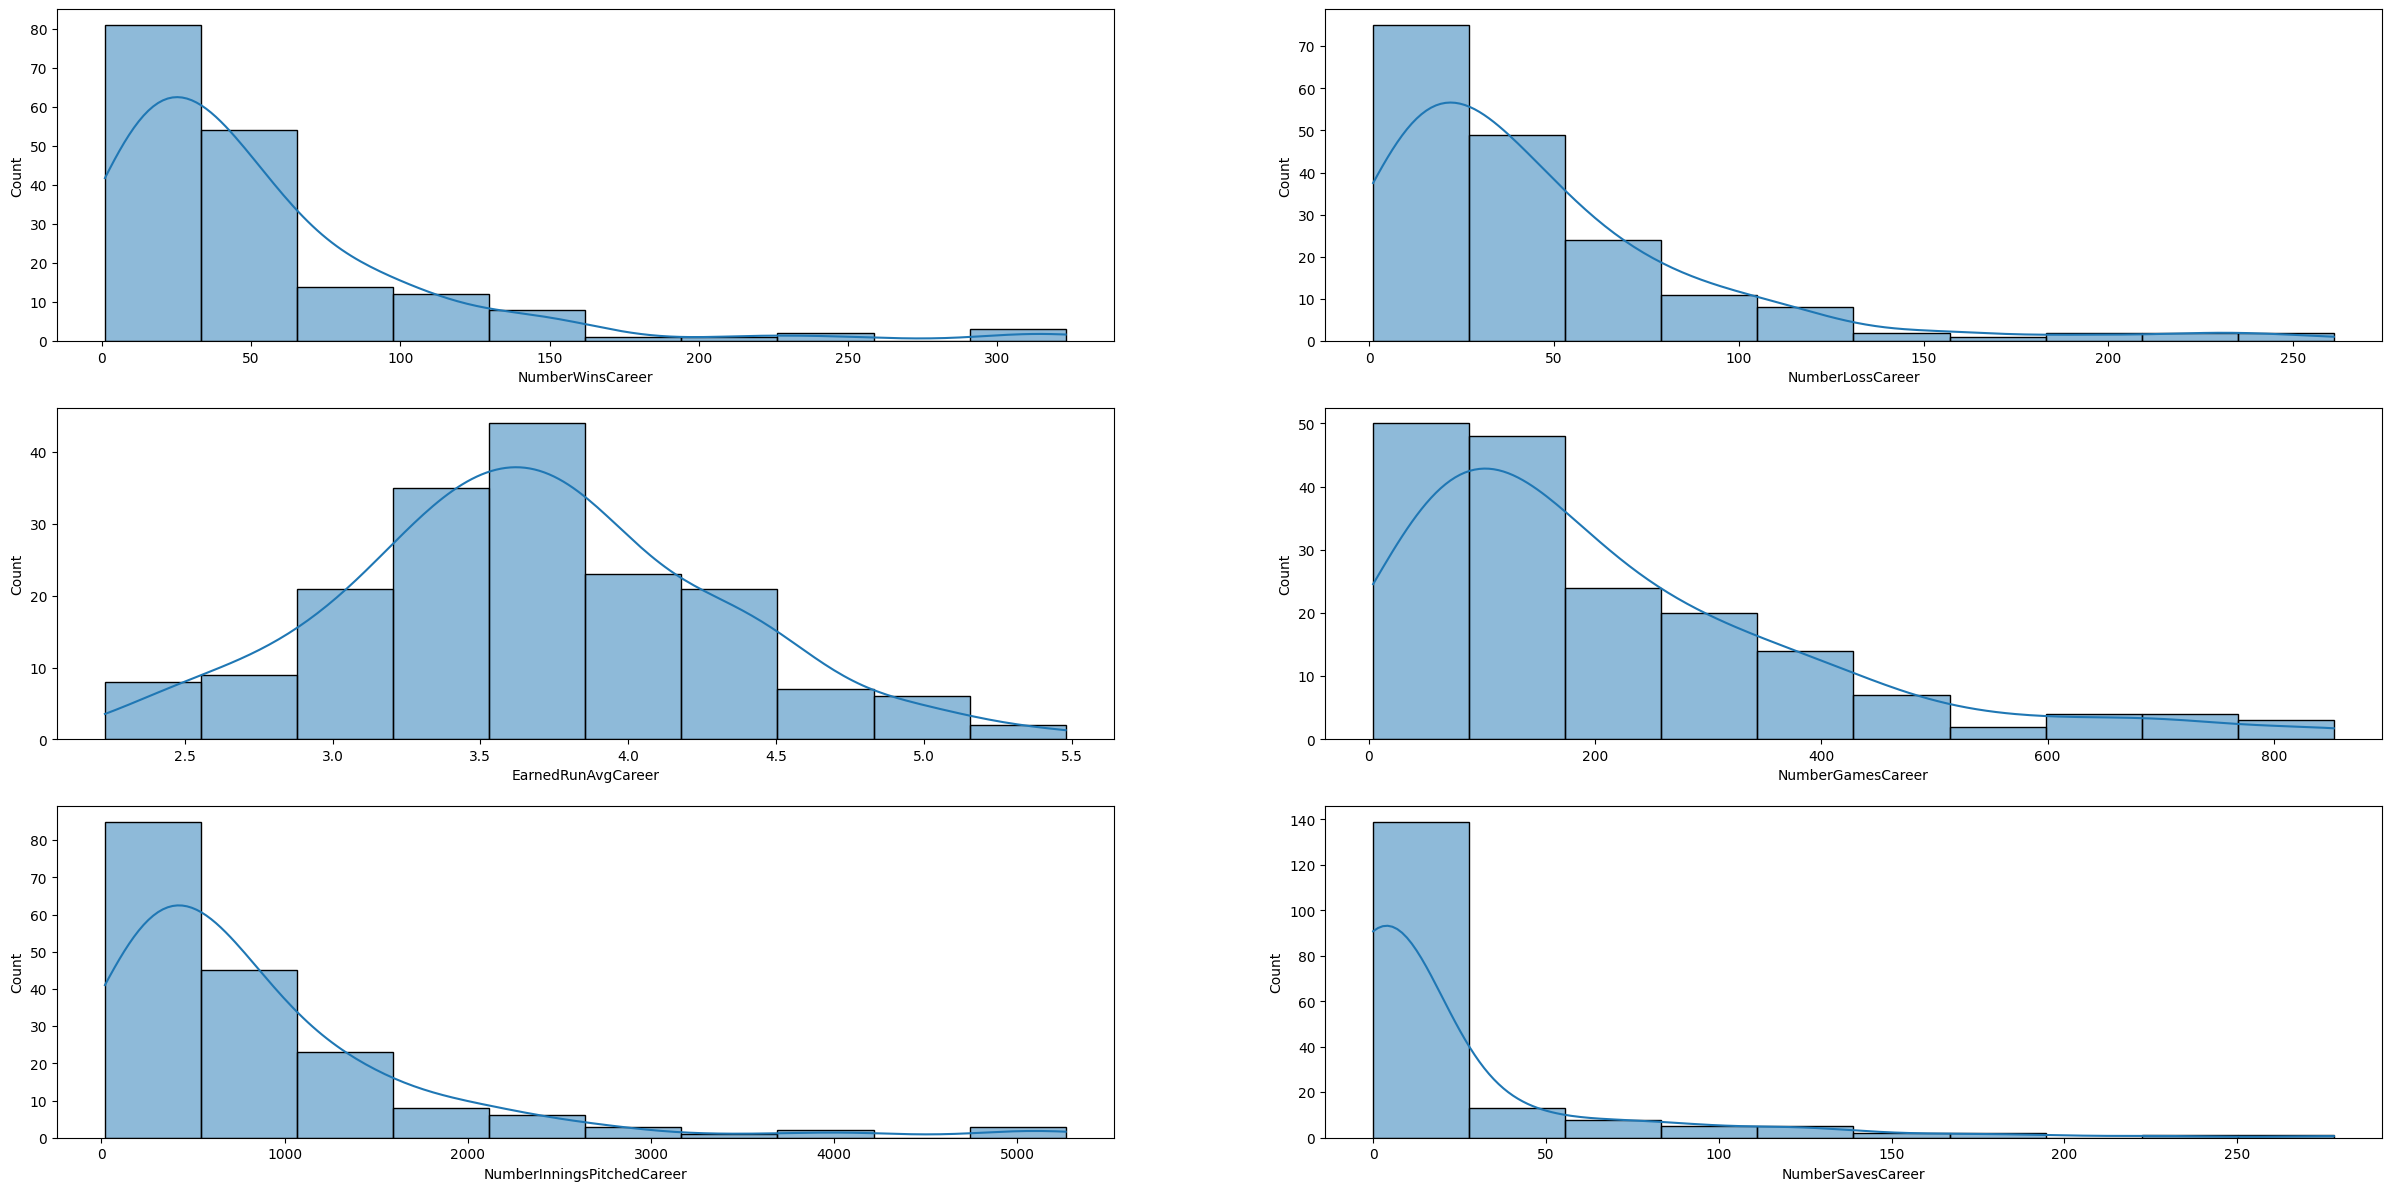

In [16]:
plt.figure(figsize=(30,25))
for i,col in enumerate(performance_career,1):
    plt.subplot(5,2,i)
    sns.histplot(pitchers_copy[col],kde=True,bins = 10)

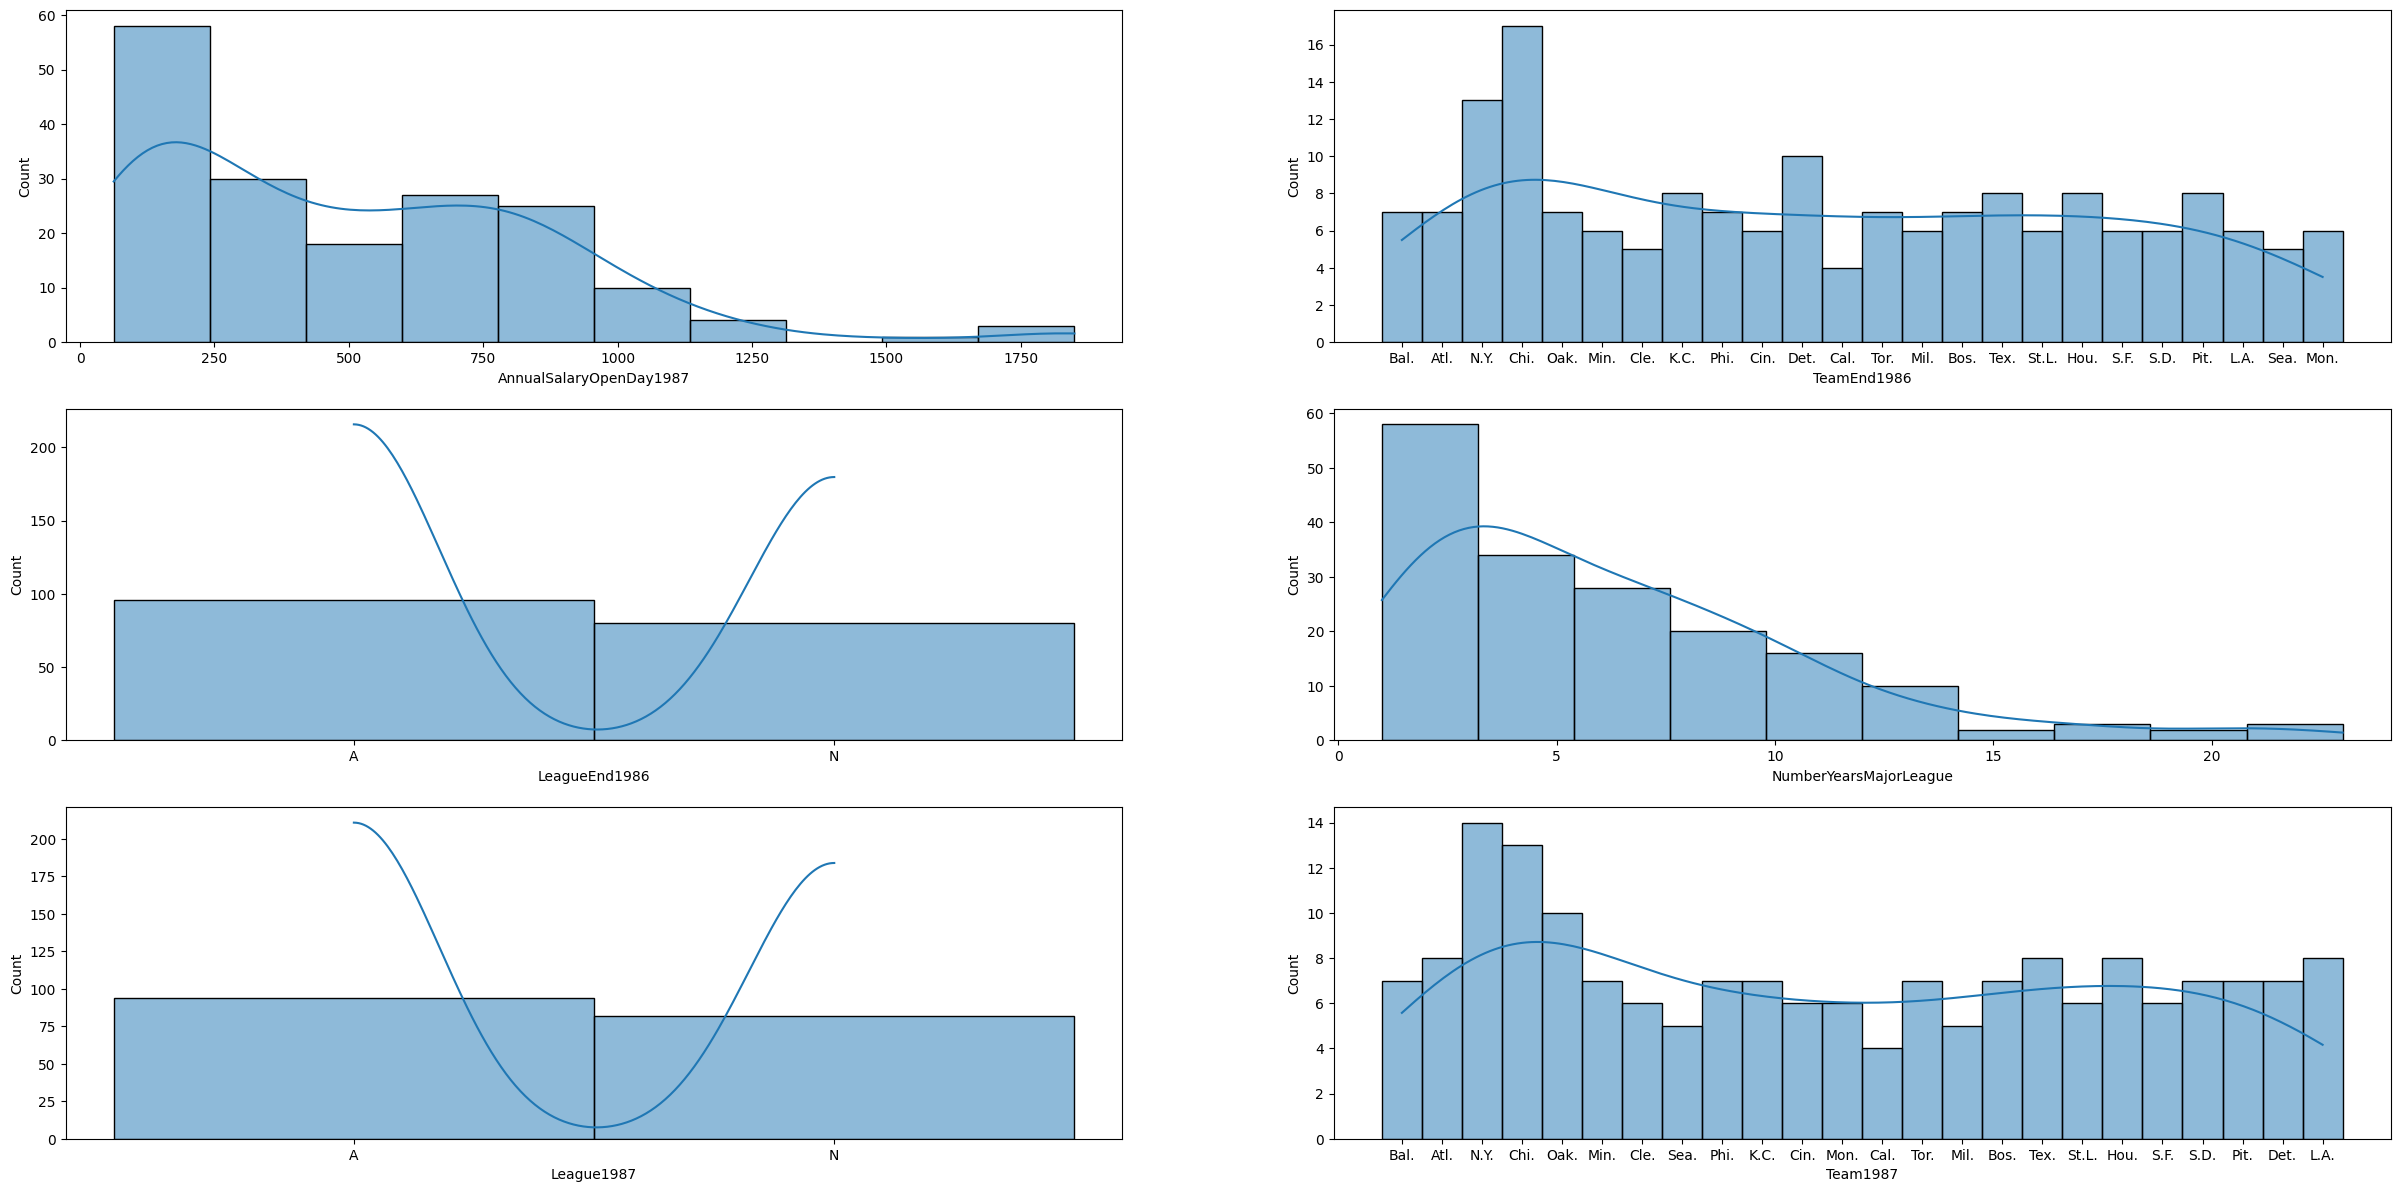

In [17]:
plt.figure(figsize=(30,25))
for i,col in enumerate(target+non_performance_metrics,1):
    plt.subplot(5,2,i)
    sns.histplot(pitchers_copy[col],kde=True,bins = 10)

/var/folders/_g/pnkjprqj7z3d7wwtd6jwl2fc0000gn/T/ipykernel_48284/1592335250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitchers_copy["logsalary"] = np.log(pitchers_copy['AnnualSalaryOpenDay1987'])
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_g/pnkjprqj7z3d7wwtd6jwl2fc0000gn/T/ipykernel_48284/1592335250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

<Axes: >

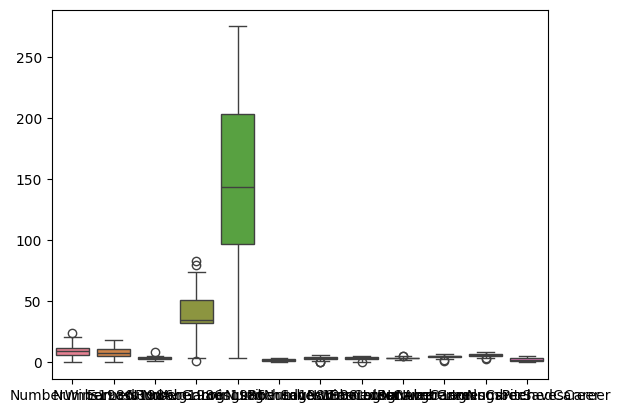

In [18]:

log_applicable = ["NumberSaves1986", "NumberWinsCareer","NumberLossCareer","NumberGamesCareer","NumberInningsPitchedCareer","NumberSavesCareer"]
pitchers_copy["logsalary"] = np.log(pitchers_copy['AnnualSalaryOpenDay1987'])
for col in log_applicable:
  pitchers_copy["Log"+col] = np.log(pitchers_copy[col])

performance_1986 = ["NumberWins1986","NumberLoss1986","EarnedRunAvg1986","NumberGames1986","NumberInningsPitched1986","LogNumberSaves1986"]
performance_career = ["LogNumberWinsCareer","LogNumberLossCareer","EarnedRunAvgCareer","LogNumberGamesCareer","LogNumberInningsPitchedCareer","LogNumberSavesCareer"]
non_performance_metrics = ["TeamEnd1986","LeagueEnd1986","NumberYearsMajorLeague","League1987","Team1987"]
target = ["AnnualSalaryOpenDay1987"]






sns.boxplot(data=pitchers_copy[performance_1986 + performance_career])

# sns.boxplot(x='Assists1986',data =pitchers_copy, ax=axarr[3][1])
# sns.boxplot(x='Errors1986',data =pitchers_copy, ax=axarr[4][0])
# sns.boxplot(x='PutOuts1986',data =pitchers_copy, ax=axarr[4][1])
#pitchers_copy["2*errors/(putout-assist)"] = pitchers_copy.apply(calculate_new_value, axis=1)


<Axes: >

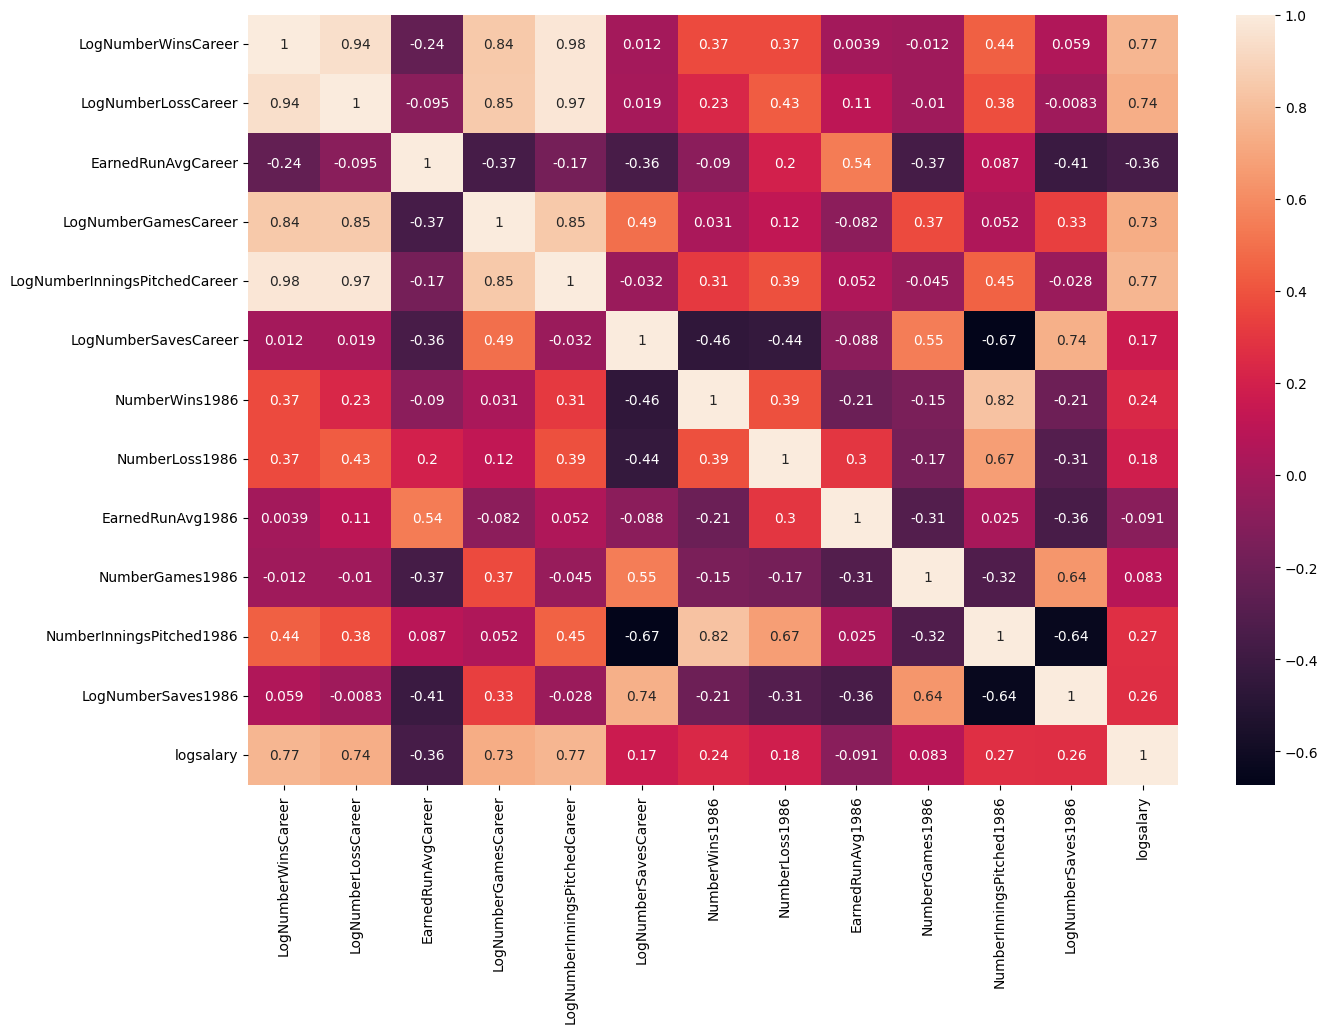

In [ ]:
plt.figure(figsize=(15,10))

pitchers_copy["winratio"]
sns.heatmap(pitchers_copy[[*performance_career, *performance_1986, "logsalary"]].corr(),annot = True)

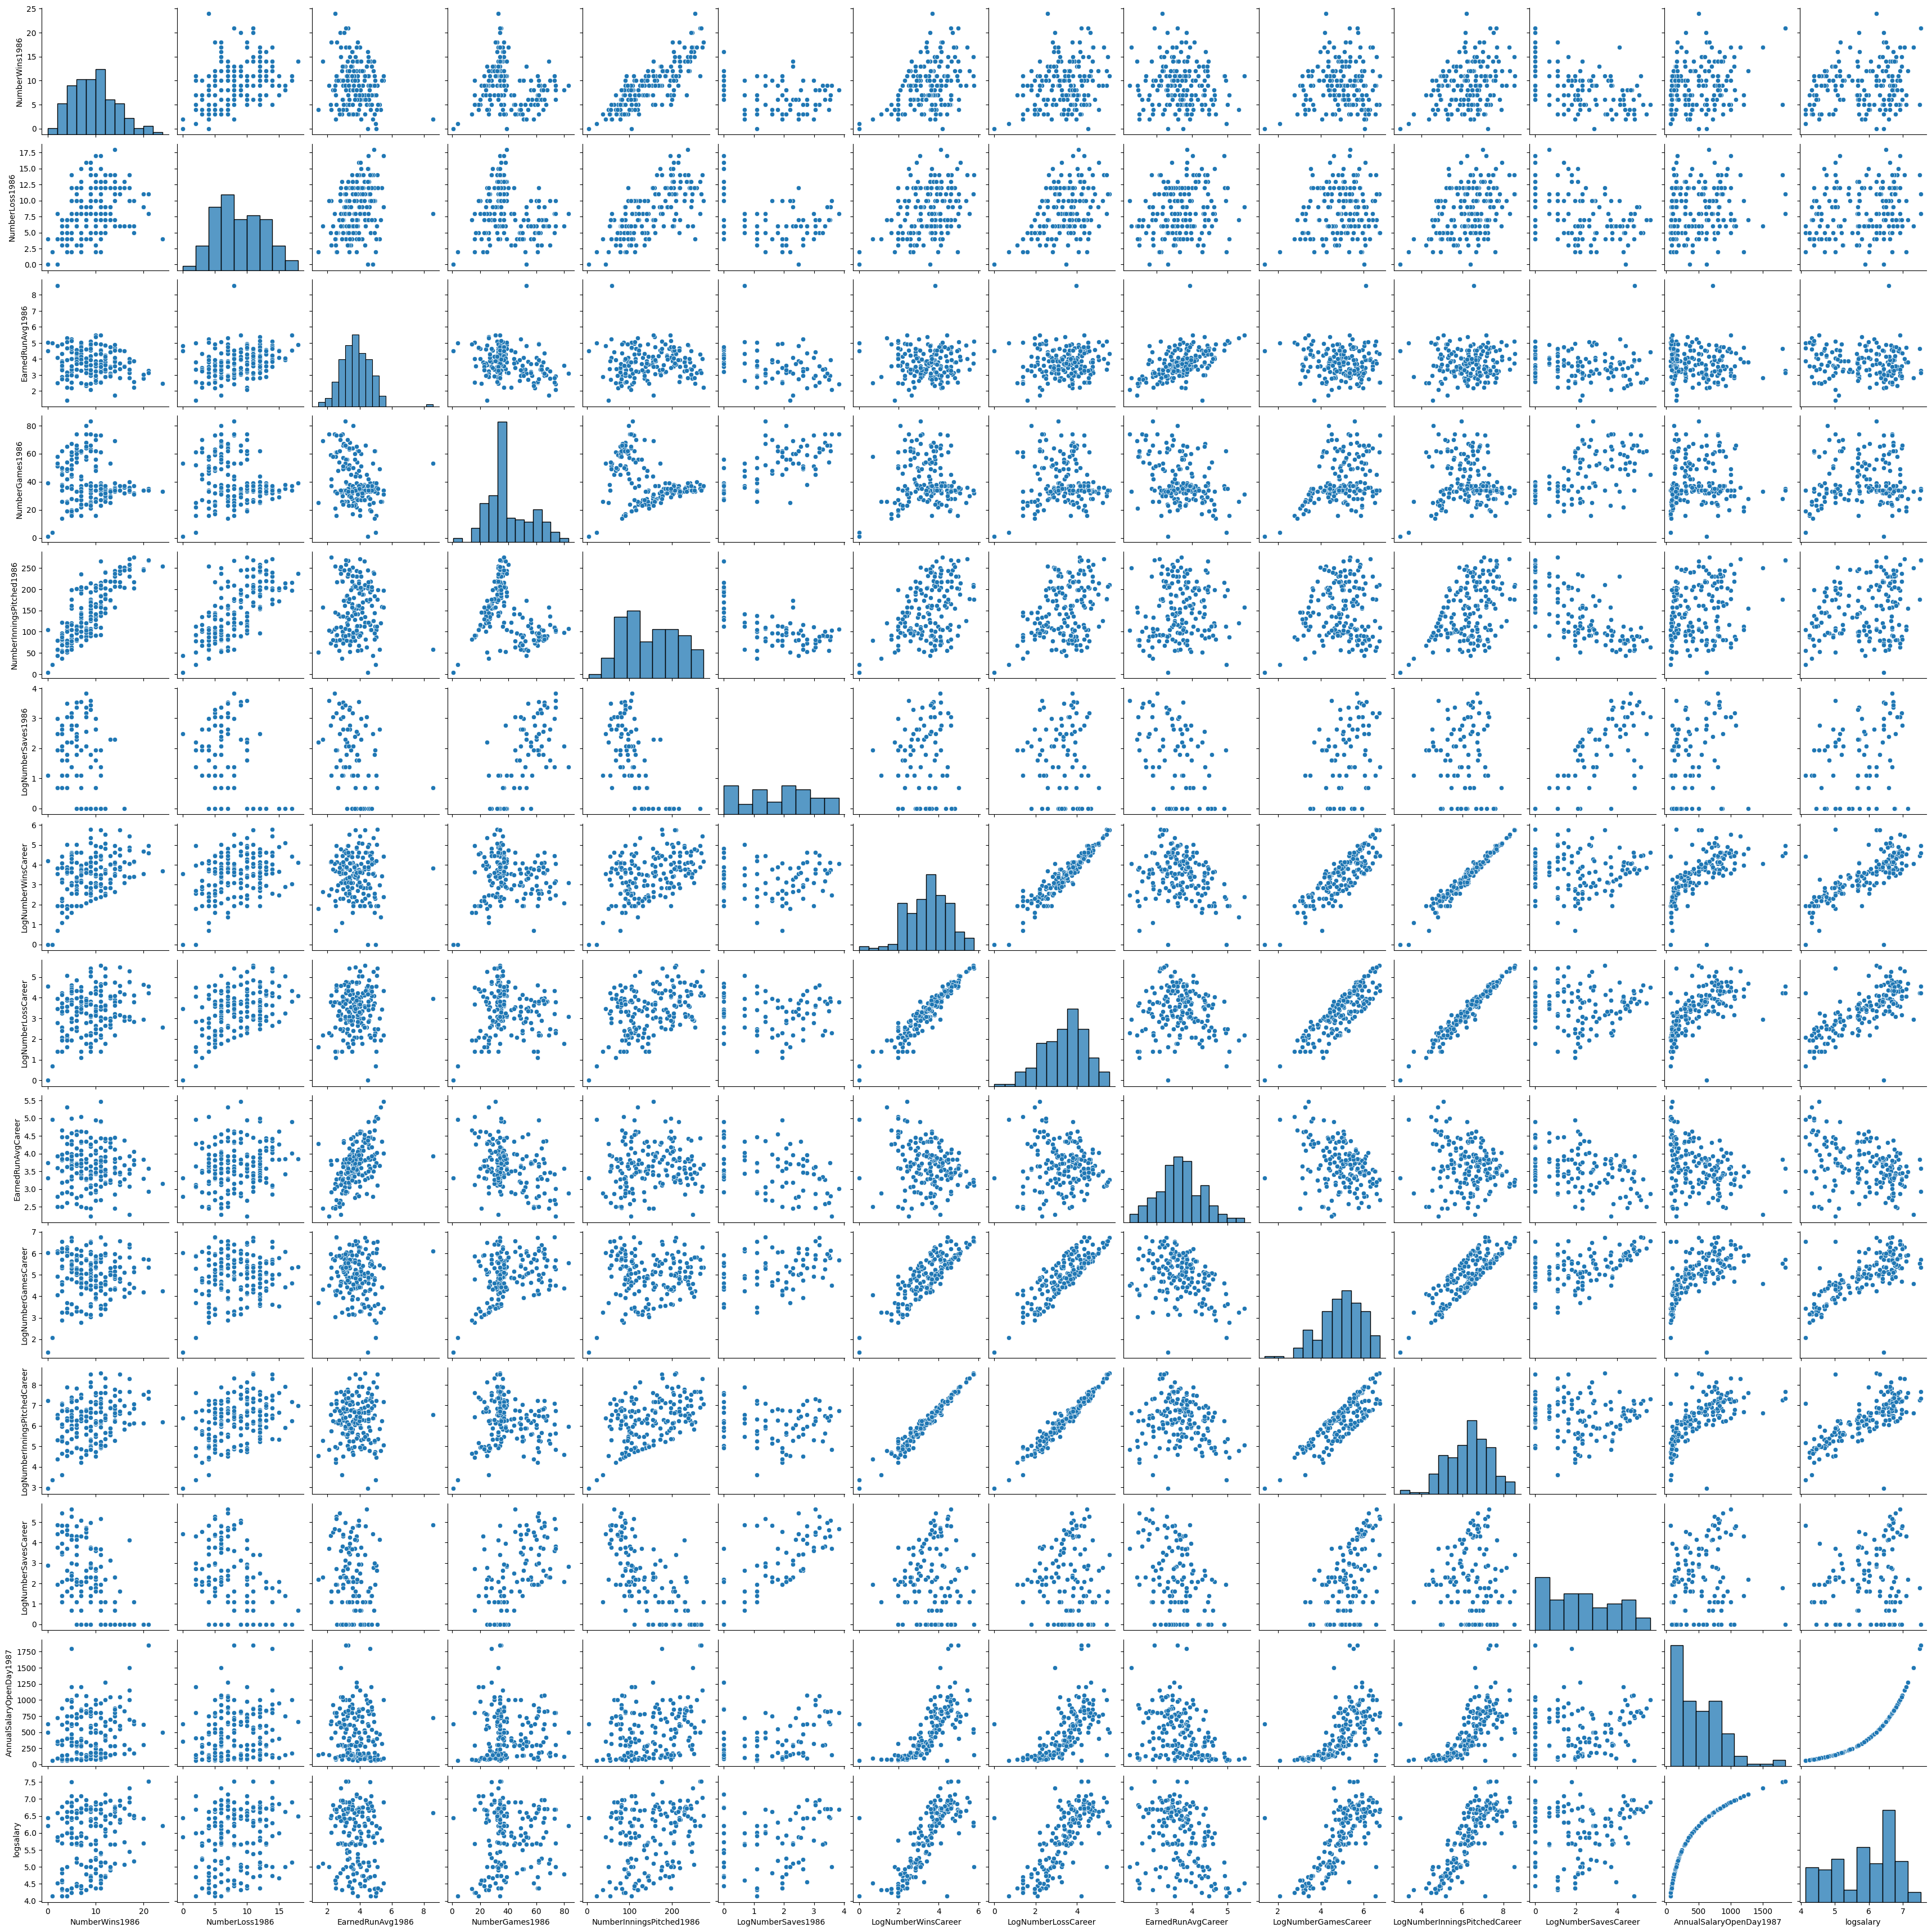

In [21]:
target_column = ['logsalary']

#  To understand relationship between variables
sns.pairplot(pitchers_copy[[*performance_1986, *performance_career, "AnnualSalaryOpenDay1987" , *target_column]])


/var/folders/_g/pnkjprqj7z3d7wwtd6jwl2fc0000gn/T/ipykernel_48284/1285027044.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.replace([np.inf, -np.inf], np.nan, inplace=True)


                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              24.67
Date:                Sun, 01 Dec 2024   Prob (F-statistic):                    8.50e-17
Time:                        04:10:24   Log-Likelihood:                         -63.778
No. Observations:                  79   AIC:                                      141.6
Df Residuals:                      72   BIC:                                      158.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

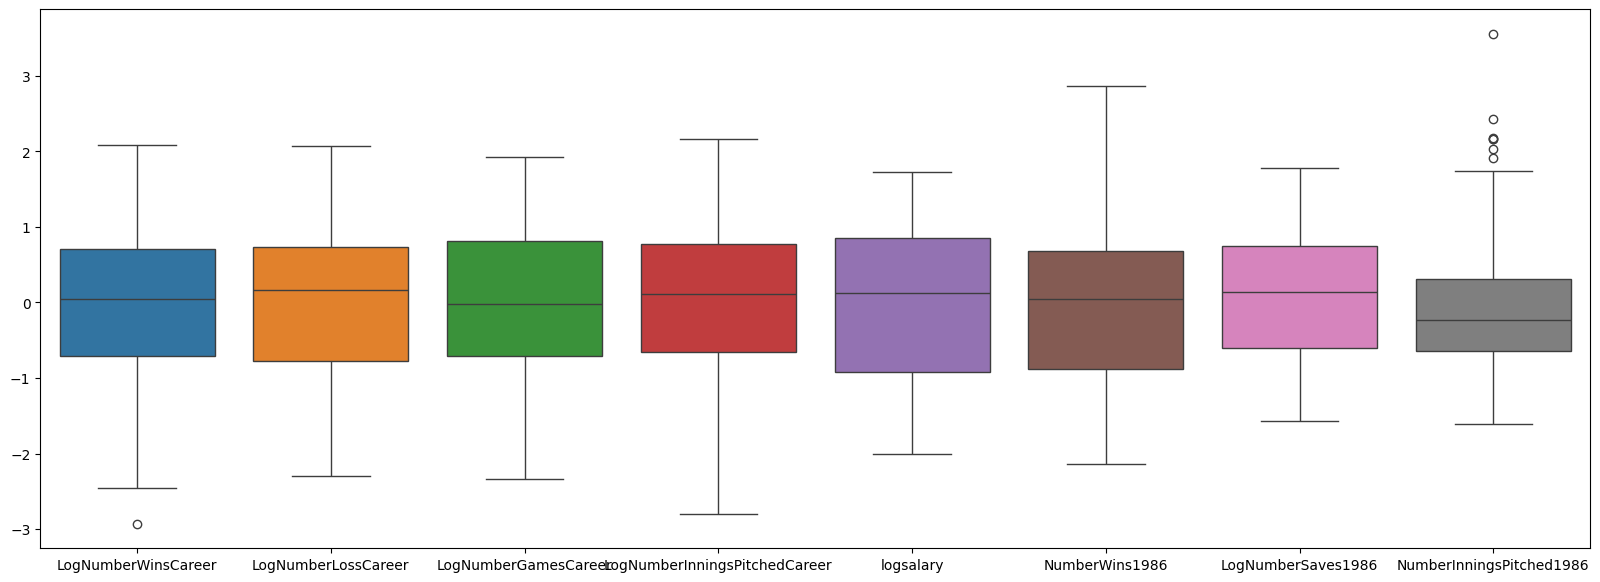

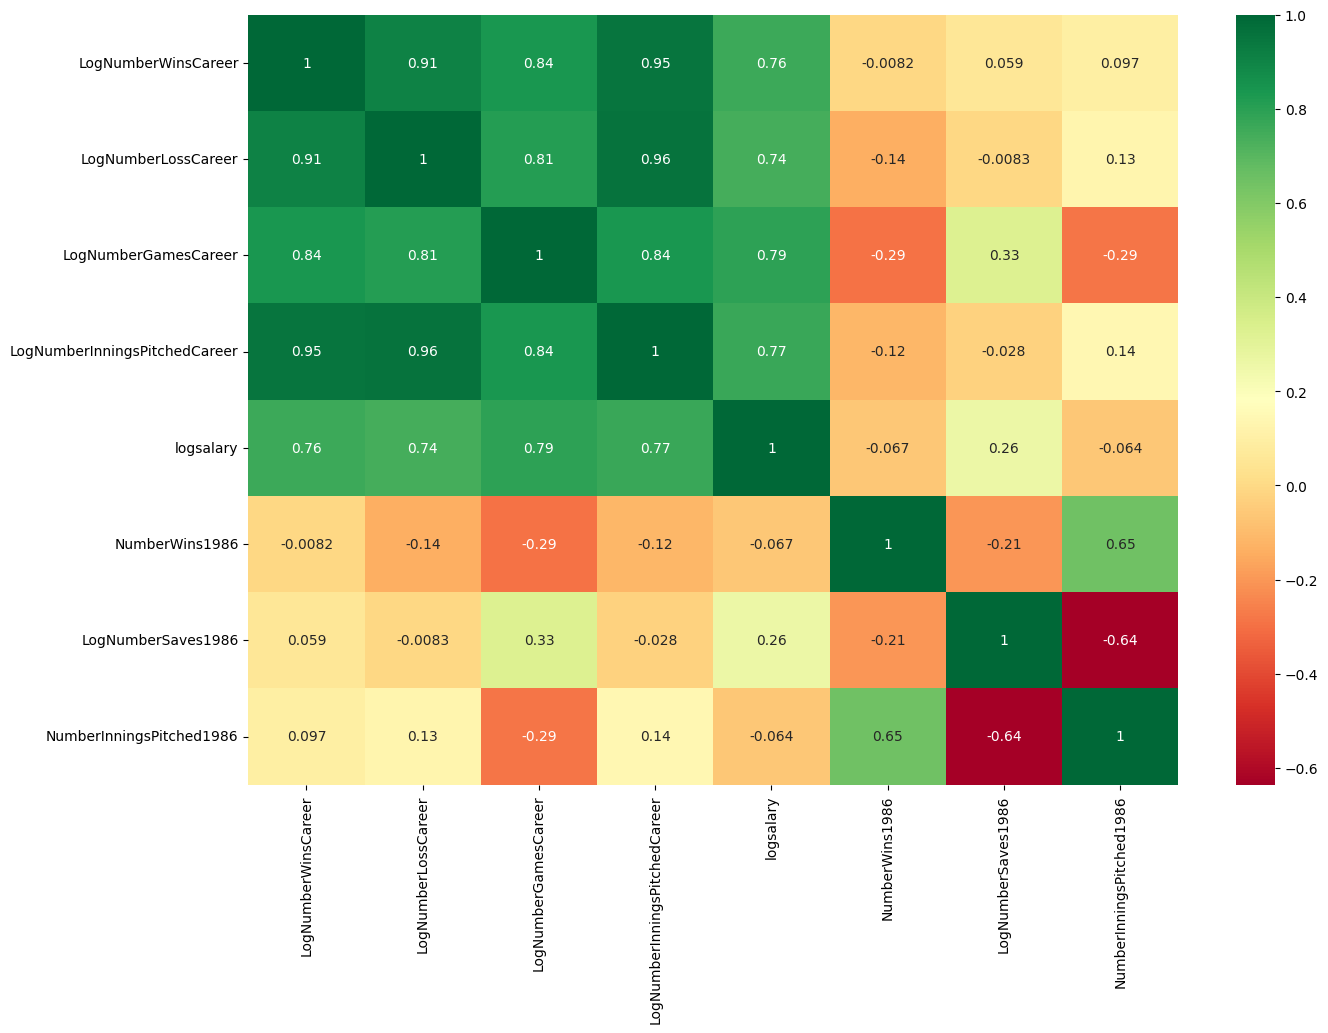

In [34]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()


# cols = performance_career+performance_1986+target_column
cols = ["LogNumberWinsCareer", "LogNumberLossCareer", "LogNumberGamesCareer", "LogNumberInningsPitchedCareer"]+ target_column + ["NumberWins1986", "LogNumberSaves1986", "NumberInningsPitched1986"]

# cols.remove("LogYearsMajorleag")
# cols.remove('LogPutOuts1986')
# cols.remove('LogAssists1986')
# cols.remove('LogErrors1986')
final_df = pitchers_copy[cols]
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (which replaced infinities)
final_df = final_df.dropna()

final_df.isin([np.inf, -np.inf]).sum().sum()




X = final_df
X[cols] = scaler.fit_transform(X)



plt.figure(figsize=(20,7))
sns.boxplot(data = X)
cols.remove("logsalary")

plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot = True,cmap="RdYlGn")


model = sm.OLS(X["logsalary"], X[cols])
results = model.fit()
print(results.summary())




Only EarnedRunAvgCareer has a significance level, so we pick significant even above 0.5


In [40]:
signifanct_cols = ["LogNumberGamesCareer"]
# signifanct_cols = ["LogNumberGamesCareer"]
target_column = ["logsalary"]




model = sm.OLS(X[target_column[0]], X[signifanct_cols])
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.622
Method:                 Least Squares   F-statistic:                              131.2
Date:                Sun, 01 Dec 2024   Prob (F-statistic):                    2.19e-18
Time:                        04:16:15   Log-Likelihood:                         -73.122
No. Observations:                  79   AIC:                                      148.2
Df Residuals:                      78   BIC:                                      150.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<Figure size 600x400 with 0 Axes>

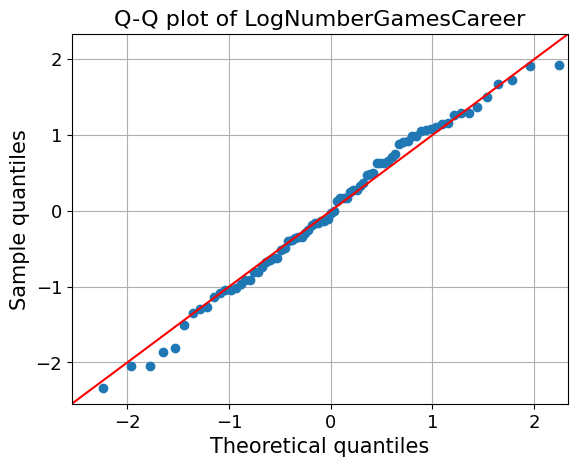

In [41]:
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=X[signifanct_cols]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(X[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_cols = X[signifanct_cols]
y_cols = X[target_column[0]]

X_train, X_test,y_train, y_test = train_test_split(X_cols,y_cols ,random_state=42,train_size=0.8)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     LogNumberGamesCareer
193             -0.959732
159             -1.805798
149              0.628964
116             -0.259343
28              -0.339266

X_test : 
    LogNumberGamesCareer
85             -0.616236
0               0.751325
65              0.164794
87             -0.914797
59              0.127803

y_train : 
193   -1.194359
159   -0.918429
149    1.151535
116   -0.092621
28    -0.311747
Name: logsalary, dtype: float64

y_test : 
85   -1.143880
0     0.846279
65    0.309782
87   -0.417049
59   -0.061314
Name: logsalary, dtype: float64


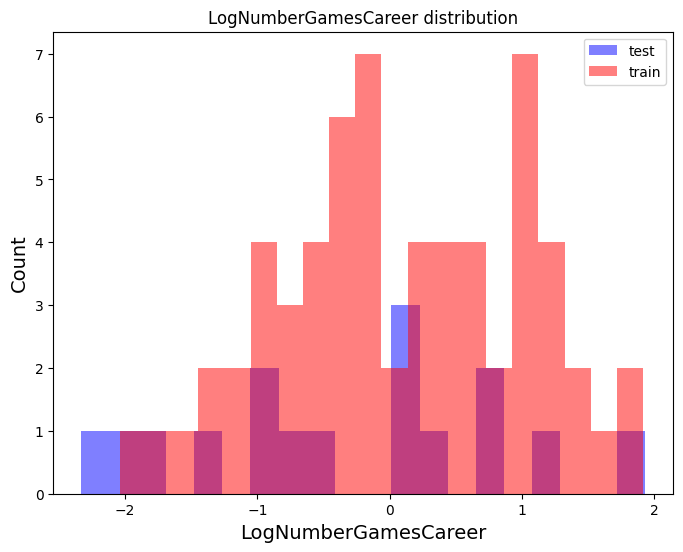

In [43]:
X_test_plot = X_test[signifanct_cols]
X_train_plot = X_train[signifanct_cols]
for col in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))

    plt.hist(X_test_plot[col], bins=20, alpha=0.5, label="test",color = 'b')
    plt.hist(X_train_plot[col], bins=20, alpha=0.5, label="train",color = 'r')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)

    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

The intercept b0=  0.027201132982826712
The coefficient b1=  [0.76566553]
Training Score: 0.5673546902690816
MAE: 0.40651901697324266
MSE: 0.317749399840112
RMSE: 0.5636926466081601
R2: 0.7440459083835198


Text(0.5, 1.0, 'Histogram of residuals')

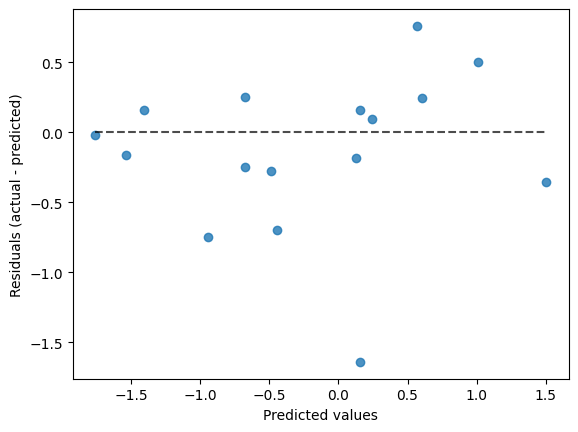

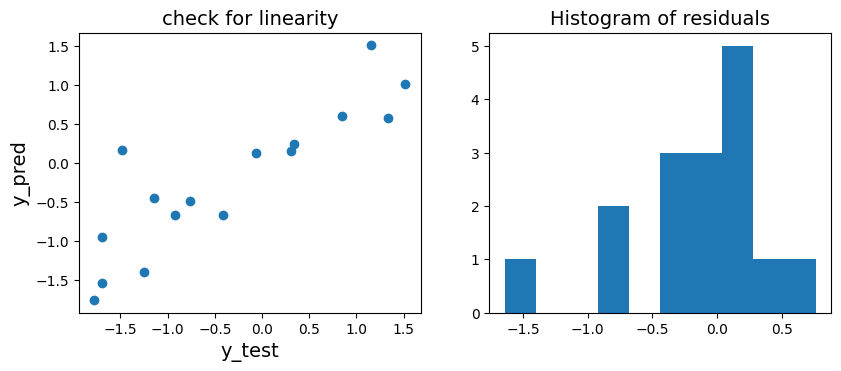

In [ ]:
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)




#printing the regression coefficients

print("The intercept b0= ", linearModel.intercept_)

print("The coefficient b1= ", linearModel.coef_)
print(f"Training Score: {linearModel.score(X_train, y_train)}")
predictions = linearModel.predict(X_test)

from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_absolute_error, r2_score

display = PredictionErrorDisplay(y_true=y_test, y_pred=predictions)
display.plot()
# Compute metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, predictions)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - predictions)
plt.title('Histogram of residuals',fontsize=14)



MAE: 0.40411151167517567
MSE: 0.3105711380663517
RMSE: 0.5572890973869413
R2: 0.7498281552504301


Text(0.5, 1.0, 'Q-Q plot')

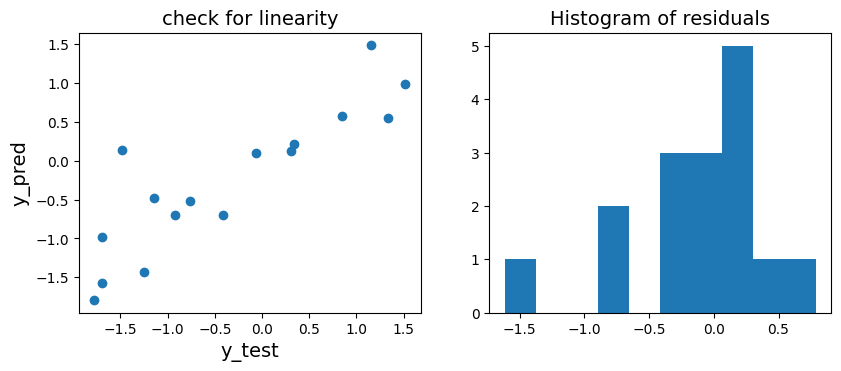

<Figure size 640x480 with 0 Axes>

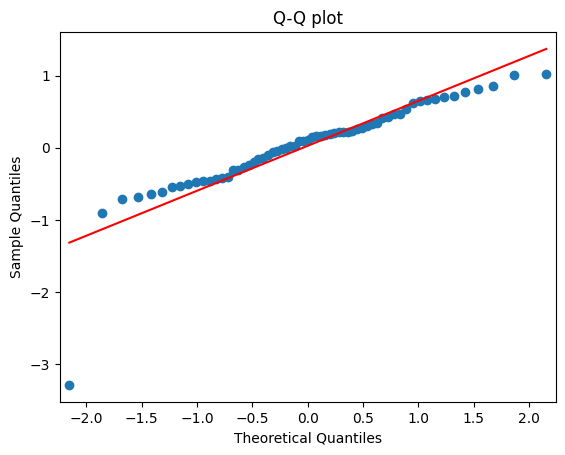

In [46]:
olsModel = sm.OLS(y_train,X_train)
olsFit = olsModel.fit()# print(olsModel_fit.summary())

y_pred = olsFit.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(olsFit.resid,line='s')
plt.title("Q-Q plot")